In [ ]:
!git clone https://github.com/ManDes71/Rakuten_Text_Classification_ML.git

In [1]:
import sys
sys.path.append('/content/Rakuten_Text_Classification_ML')

!pip install -r /content/Rakuten_Text_Classification_ML/requirements.txt

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline





In [ ]:
"""
https://stackedit.io/app#
Logistic Regression (LogisticRegression)  +++++
Random Forest Classifier (RandomForestClassifier)  ++++
Gradient Boosting Classifier (GradientBoostingClassifier) +++++
Decision Trees (DecisionTreeClassifier) +++++
k-Nearest Neighbors (KNeighborsClassifier)
Multinomial Naive Bayes (MultinomialNB) ++++
Gaussian Naive Bayes (GaussianNB)
Support Vector Classification (SVC), mais cela nécessite le paramètre probability=True lors de l'initialisation du modèle. ++++
AdaBoost Classifier (AdaBoostClassifier)
Extra Trees Classifier (ExtraTreesClassifier)
XGBoost Classifier (bien que ce ne soit pas de scikit-learn, XGBoost a une méthode predict_proba) ++++
"""

In [5]:
import Bibli_DataScience_3_1 as ds
import ML_DataScience as ml
import imp
imp.reload(ds)
imp.reload(ml)

KeyError: 'DOSSIER'

# Modèle SVC


J'ai créé une classe pour le modele SVC : **ML_SVC**  
*préprocessing :*
 1. concaténation des champs "désignation" et "description"
 2. expression régulière :  `r = re.compile(r"[a-zA-Z0-9âéè°]{2,}")`
	 on ne garde	que certains caractères et les mots d'au moins 2 caractères
 3.  on découpe chaque phrase en une liste de mots : word_tokenize
 4.  on met tous les mots de la phrase en minuscule
 5.  on retire les stopswords par langue à partir du module nltk.corpus


    def clean_sentence(self,sentence,langue):
            if langue == 'en':
                SW = stopwords.words('english')
            elif langue == 'fr':
                SW = stopwords.words('french')
            elif langue == 'de':
                SW = stopwords.words('german')
            elif langue == 'ca':
                SW = stopwords.words('french')
            elif langue == 'nl':
                SW = stopwords.words('dutch')
            elif langue == 'it':
                SW = stopwords.words('italian')
            elif langue == 'es':
                SW = stopwords.words('spanish')
            else:
                SW = stopwords.words('french')
             # Pour chaque mot de la phrase (dans l'ordre inverse)
            for i, word in reversed(list(enumerate(sentence))):
                    # Si le mot est un stopword
                    if word in SW :
                        # On l'enlève de l'artikle
                        sentence.pop(i)
            return sentence   

 6. on retire les stopswords issus d'une liste personnalisée

> Au final on envoie au modèle une liste de mots caractéristiques issus
> des champs désignations et descriptions

*pipeline :*  
la classe utilise un pipeline :


       text_clf = Pipeline([
                     ('tfidf', TfidfVectorizer(lowercase=True,max_df=0.8, min_df=2)),
                    ('clf', SVC(C=10,class_weight=None,kernel='rbf',probability=True)),
                     ])

In [ ]:
svc = ml.ML_SVC("Mon_Modele_SVC")
df_feat = svc.get_df_feats()
df = svc.get_DF()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


preprocessing ...


In [ ]:
df[['Id','designation','description','productid','imageid','PAYS_LANGUE','RATIO_LANGUE','phrases','prdtypecode']].head()

,Id,designation,description,productid,imageid,PAYS_LANGUE,RATIO_LANGUE,phrases,prdtypecode
0,0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,de,0.99,"[olivia, personalisiertes, notizbuch, 150, sei...",10
1,1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,fr,0.99,"[journal, arts, n°, 133, 28, 09, 2001, art, ma...",2280
2,2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,fr,0.99,"[grand, stylet, ergonomique, bleu, gamepad, ni...",50
3,3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,de,0.85,"[peluche, donald, europe, disneyland, 2000, ma...",1280
4,4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,fr,0.99,"[guerre, tuques, luc, id, grandeur, veut, orga...",2705


In [ ]:
svc.fit_modele(savefics=True,Train="Save")

L'heure au début de l'entraînement était :  2023-10-26 14:26:32.040186
L'heure à la fin de l'entraînement était :  2023-10-26 16:29:05.122805
F1 Score:  0.8294178505558132
Accuracy:  0.8256594441827603
La durée de l'entraînement était :  2:02:33.082619


>tableau récapitulatif:  
**pour chaque classe réelle**, les **3 premières classes prédites** et leurs probabilités

In [ ]:
df_cross = svc.get_df_cross()
df_pred = svc.get_df_pred()
df_pred.head(30)

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.719101,2280,0.112360,2403,0.062600
1,40,40,0.683267,10,0.085657,50,0.053785
2,50,50,0.818452,2462,0.041667,40,0.041667
3,60,60,0.807229,2462,0.072289,50,0.066265
4,1140,1140,0.788390,1280,0.050562,10,0.039326
5,1160,1160,0.930468,10,0.027813,2280,0.011378
6,1180,1180,0.581699,10,0.143791,1280,0.078431
7,1280,1280,0.728953,1281,0.067762,1300,0.048255
8,1281,1281,0.553140,1280,0.188406,10,0.082126
9,1300,1300,0.940535,1280,0.030723,10,0.012884


In [ ]:
df_prob = svc.get_df_prob()
df_prob.head()

,predicted_class,ProbMax
0,1301,0.999738
1,1140,0.569627
2,2583,0.999995
3,2280,0.675670
4,2403,0.944309


In [ ]:
y_orig = svc.get_y_orig()
y_pred = svc.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 82.56594441827603 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.41      0.72      0.52       623
          40       0.76      0.68      0.72       502
          50       0.79      0.82      0.80       336
          60       0.99      0.81      0.89       166
        1140       0.81      0.79      0.80       534
        1160       0.94      0.93      0.93       791
        1180       0.93      0.58      0.71       153
        1280       0.70      0.73      0.71       974
        1281       0.67      0.55      0.61       414
        1300       0.94      0.94      0.94      1009
        1301       0.97      0.86      0.91       161
        1302       0.89      0.78      0.83       498
        1320       0.86      0.79      0.82       648
        1560       0.82      0.83      0.82      1015
        1920       0.92      0.90      0.91       861
        1940       0.99      0.8

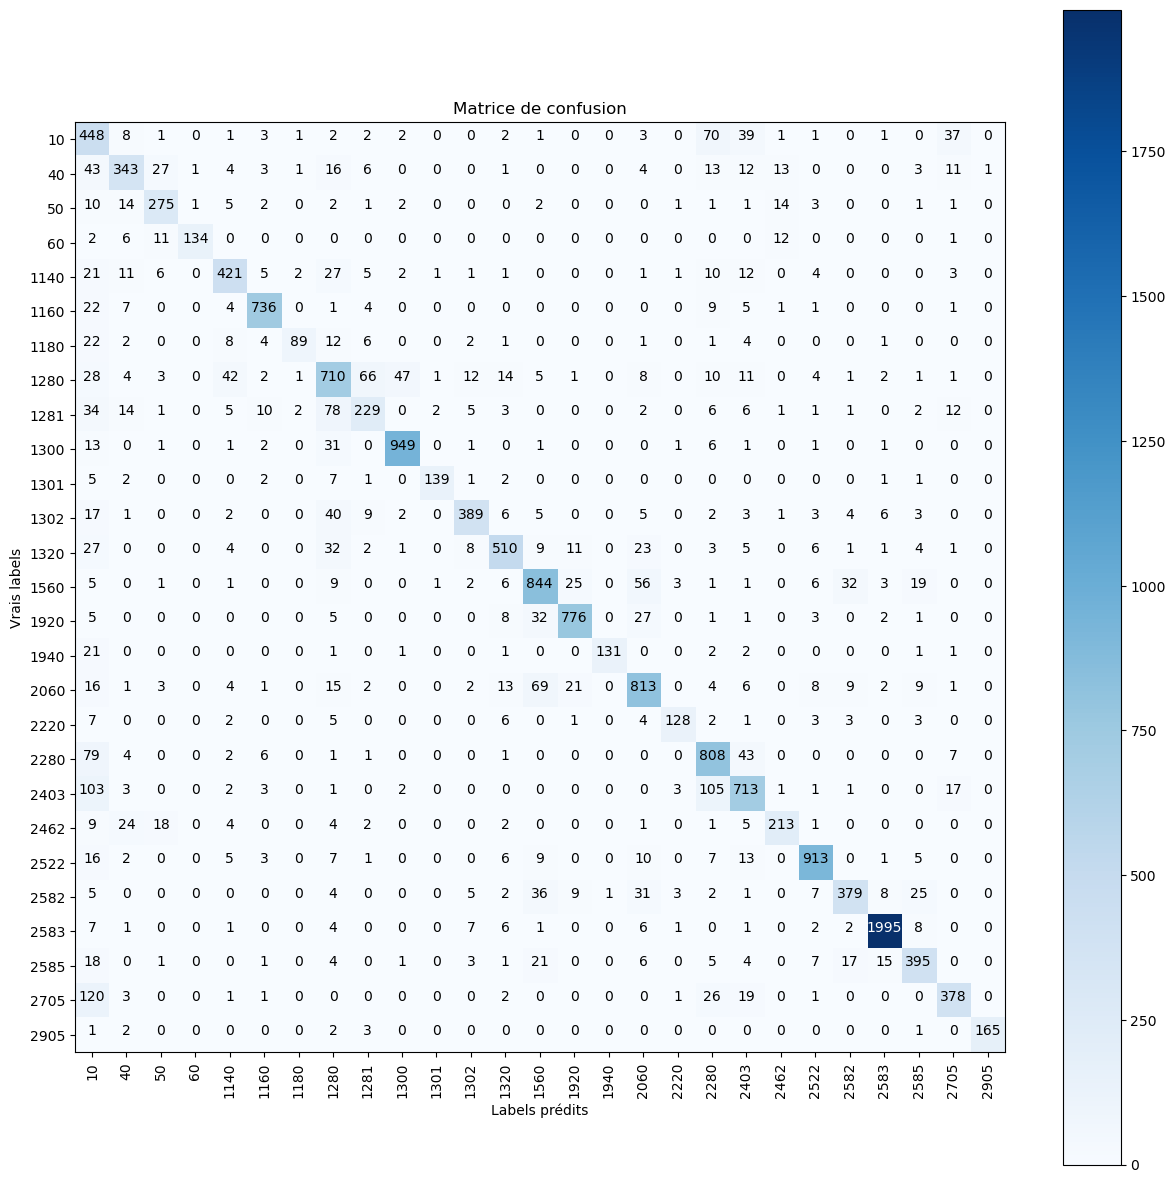

In [ ]:
ds.show_confusion_matrix(y_orig, y_pred)

>tableau récapitulatif:  
**pour chaque classe réelle**, les **5 premières classes prédites** et leurs probabilités

In [ ]:
Lcat=svc.get_cat()
catdict = svc.get_catdict()
ds.Afficher_repartition(df_cross,Lcat,catdict)

10    ------    livres
  : 10,  : 71.91 % , livres
  : 2280,  : 11.24 % , magazines
  : 2403,  : 6.26 % , livres et bds
  : 2705,  : 5.94 % , bds et livres
  : 40,  : 1.28 % , jeux video pour pc et consoles
40    ------    jeux video pour pc et consoles
  : 40,  : 68.33 % , jeux video pour pc et consoles
  : 10,  : 8.57 % , livres
  : 50,  : 5.38 % ,  accesoires jeux video
  : 1280,  : 3.19 % , jouets, peluches, puppets
  : 2462,  : 2.59 % , consoles de jeux video et jeux videos
50    ------     accesoires jeux video
  : 50,  : 81.85 % ,  accesoires jeux video
  : 2462,  : 4.17 % , consoles de jeux video et jeux videos
  : 40,  : 4.17 % , jeux video pour pc et consoles
  : 10,  : 2.98 % , livres
  : 1140,  : 1.49 % , produits derives “geeks” et figurines
60    ------    consoles de jeux video
  : 60,  : 80.72 % , consoles de jeux video
  : 2462,  : 7.23 % , consoles de jeux video et jeux videos
  : 50,  : 6.63 % ,  accesoires jeux video
  : 40,  : 3.61 % , jeux video pour pc et console

E:\Manuel\PROJET\Bibli_DataScience_3.py:155: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in s.iteritems():


In [ ]:
X_test = ds.load_ndarray("X_test")
y_test = ds.load_ndarray("y_test")
df_test = pd.concat([X_test,y_test],axis=1)

Les **40 mots les plus fréquents** par catégorie et leurs occurrences

In [ ]:

from collections import Counter

# Créez un DataFrame df_test ici. Dans votre cas, vous avez déjà ce DataFrame.

# Groupement des données par 'prdtypecode'
grouped = df_test.groupby('prdtypecode')

# Dictionnaire pour stocker les mots les plus fréquents par 'prdtypecode'
most_common_words_by_code = {}

for name, group in grouped:
    # Combinez toutes les phrases en une seule chaîne de texte
    all_text = ' '.join(group['phrases'])

    # Séparez la chaîne en mots
    words = all_text.split()

    # Comptez les occurrences de chaque mot
    word_count = Counter(words)

    # Obtenez les 40 mots les plus communs
    most_common_words = word_count.most_common(40)

    # Stockez le résultat dans le dictionnaire
    most_common_words_by_code[name] = most_common_words

# Affichez les résultats
for code, words in most_common_words_by_code.items():
    print(f"Pour le prdtypecode {code}, les 40 mots les plus fréquents sont :")
    print(words)
    print("---")



Pour le prdtypecode 10, les 40 mots les plus fréquents sont :
[('edition', 35), ('tome', 29), ('livre', 27), ('guide', 25), ('n°', 23), ('occasion', 19), ('prix', 19), ('gt', 19), ('ammareal', 18), ('organisations', 18), ('caritatives', 18), ('vendons', 18), ('partenaires', 18), ('lt', 18), ('donnons', 18), ('book', 17), ('vie', 16), ('etat', 16), ('life', 14), ('france', 13), ('chez', 13), ('collection', 12), ('histoire', 12), ('édition', 12), ('15', 12), ('science', 11), ('associations', 11), ('039', 11), ('livres', 11), ('jean', 10), ('reverse', 10), ('titre', 10), ('année', 10), ('jusqu', 10), ('39', 9), ('fran', 9), ('revue', 9), ('art', 9), ('journal', 9), ('auteur', 9)]
---
Pour le prdtypecode 40, les 40 mots les plus fréquents sont :
[('39', 259), ('jeu', 179), ('import', 170), ('produit', 144), ('titres', 111), ('contr', 93), ('comprend', 69), ('jeux', 69), ('cas', 68), ('description', 67), ('nintendo', 66), ('cette', 65), ('fiche', 61), ('magideal', 60), ('xbox', 60), ('conso

## Catégorie 10, 2705, 2280, 2403  
 Nous avons vu précédemment que ces 4 catégories avaient des mots en communs  
 Affichons les **40 mots les plus fréquents** dans ce groupe de 4 catégories

In [ ]:
selected_categories = [10, 2705, 2280, 2403]
filtered_df = df_test[df_test['prdtypecode'].isin(selected_categories)]

all_text = ' '.join(filtered_df['phrases'])


word_count = Counter(all_text.split())
occurrences_triees = sorted(word_count.items(), key=lambda x: x[1], reverse=True)[:40]

Dic_words={}
for item in occurrences_triees:
    #print(item[0], ":", item[1])
    Dic_words[item[0]]=item[1]
#print(Dic_words)
df_words=pd.DataFrame.from_dict(Dic_words, orient='index',columns=['Total'])
print("Les 10 mots les plus fréquents parmis les 40")
print(df_words.head(10))
print("Les 5 derniers mots les plus fréquents parmis les 40")
print(df_words.tail())


          Total
n°          785
rsquo       515
lot         398
france      198
vie         190
livres      183
01          171
tome        169
livre       162
histoire    160
          Total
magazine     70
02           69
03           69
temps        68
edition      66


Observons la répartitions des **20 mots les plus fréquents** dans ce groupe de 4 catégories

In [ ]:
df_total_livres=df_words
for c in [10,2705,2280,2403]:
    filtered_df = df_test[df_test['prdtypecode']==c]
    all_text = ' '.join(filtered_df['phrases'])

    word_count = Counter(all_text.split())
    occurrences_triees = sorted(word_count.items(), key=lambda x: x[1], reverse=True)[:40]
    Dic_words={}
    for item in occurrences_triees:
        Dic_words[item[0]]=item[1]
    df_words_X=pd.DataFrame.from_dict(Dic_words, orient='index',columns=[str(c)])
    df_total_livres=df_total_livres.join(df_words_X)
df_total_livres.head(20)

,Total,10,2705,2280,2403
n°,785,23.0,NaN,704.0,57.0
rsquo,515,NaN,515.0,NaN,NaN
lot,398,NaN,NaN,NaN,397.0
france,198,13.0,63.0,83.0,39.0
vie,190,16.0,127.0,32.0,NaN
livres,183,11.0,NaN,NaN,156.0
01,171,NaN,NaN,161.0,NaN
tome,169,29.0,58.0,NaN,73.0
livre,162,27.0,90.0,NaN,42.0
histoire,160,12.0,85.0,20.0,43.0


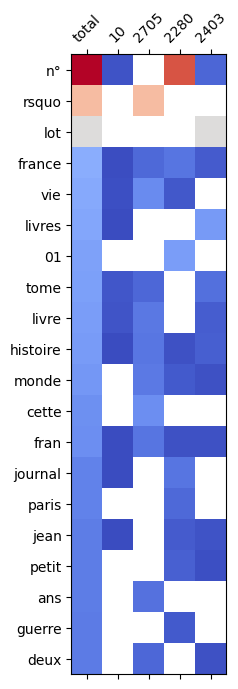

In [ ]:
fig, ax = plt.subplots(figsize=(2,20))
cax = ax.matshow(df_total_livres.iloc[0:20], cmap = 'coolwarm')
plt.xticks(range(5),('total','10','2705','2280','2403'),rotation=45)
plt.yticks(range(20),df_total_livres.iloc[0:20].index,rotation=0)
plt.show()

## Catégorie 40,50,2462

In [ ]:
selected_categories = [40,50,2462]
filtered_df = df_test[df_test['prdtypecode'].isin(selected_categories)]

all_text = ' '.join(filtered_df['phrases'])


word_count = Counter(all_text.split())
occurrences_triees = sorted(word_count.items(), key=lambda x: x[1], reverse=True)[:40]

Dic_words={}
for item in occurrences_triees:
    #print(item[0], ":", item[1])
    Dic_words[item[0]]=item[1]
#print(Dic_words)
df_words=pd.DataFrame.from_dict(Dic_words, orient='index',columns=['Total'])
print(df_words.head(10))
print(df_words.tail())

          Total
39          775
jeu         481
jeux        337
nintendo    327
console     277
produit     223
charge      211
contr       193
xbox        188
usb         180
             Total
description     93
batterie        93
fil             92
poignée         92
manettes        89


In [ ]:
df_total_livres=df_words
for c in [40,50,2462]:
    filtered_df = df_test[df_test['prdtypecode']==c]
    all_text = ' '.join(filtered_df['phrases'])

    word_count = Counter(all_text.split())
    occurrences_triees = sorted(word_count.items(), key=lambda x: x[1], reverse=True)[:40]
    Dic_words={}
    for item in occurrences_triees:
        Dic_words[item[0]]=item[1]
    df_words_X=pd.DataFrame.from_dict(Dic_words, orient='index',columns=[str(c)])
    df_total_livres=df_total_livres.join(df_words_X)
df_total_livres.head(20)

,Total,40,50,2462
39,775,259.0,508.0,8.0
jeu,481,179.0,231.0,71.0
jeux,337,69.0,144.0,124.0
nintendo,327,66.0,215.0,46.0
console,277,60.0,188.0,29.0
produit,223,144.0,79.0,NaN
charge,211,NaN,194.0,NaN
contr,193,93.0,100.0,NaN
xbox,188,60.0,73.0,55.0
usb,180,NaN,142.0,NaN


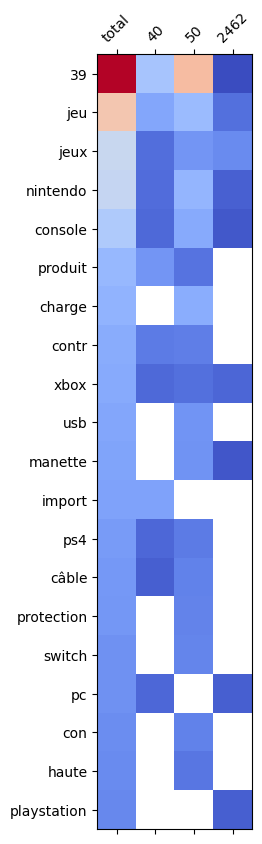

In [ ]:
fig, ax = plt.subplots(figsize=(2,20))
cax = ax.matshow(df_total_livres.iloc[0:20], cmap = 'coolwarm')
plt.xticks(range(4),('total','40','50','2462'),rotation=45)
plt.yticks(range(20),df_total_livres.iloc[0:20].index,rotation=0)
plt.show()

## Catégorie 1280,1281

In [ ]:
selected_categories = [1280,1281]
filtered_df = df_test[df_test['prdtypecode'].isin(selected_categories)]

all_text = ' '.join(filtered_df['phrases'])


word_count = Counter(all_text.split())
occurrences_triees = sorted(word_count.items(), key=lambda x: x[1], reverse=True)[:40]

Dic_words={}
for item in occurrences_triees:
    #print(item[0], ":", item[1])
    Dic_words[item[0]]=item[1]
#print(Dic_words)
df_words=pd.DataFrame.from_dict(Dic_words, orient='index',columns=['Total'])
print(df_words.head(10))
print(df_words.tail())

         Total
39        2732
enfants   1163
jouet      537
bébé       518
taille     502
jouets     479
haute      426
couleur    395
jeu        385
cadeau     370
           Total
nbsp         190
plastique    189
paquet       187
modèle       186
puzzle       185


In [ ]:
df_total_livres=df_words
for c in [1280,1281]:
    filtered_df = df_test[df_test['prdtypecode']==c]
    all_text = ' '.join(filtered_df['phrases'])

    word_count = Counter(all_text.split())
    occurrences_triees = sorted(word_count.items(), key=lambda x: x[1], reverse=True)[:40]
    Dic_words={}
    for item in occurrences_triees:
        Dic_words[item[0]]=item[1]
    df_words_X=pd.DataFrame.from_dict(Dic_words, orient='index',columns=[str(c)])
    df_total_livres=df_total_livres.join(df_words_X)
df_total_livres.head(20)

,Total,1280,1281
39,2732,2256.0,476.0
enfants,1163,883.0,280.0
jouet,537,412.0,125.0
bébé,518,429.0,89.0
taille,502,421.0,81.0
jouets,479,373.0,106.0
haute,426,357.0,69.0
couleur,395,309.0,86.0
jeu,385,NaN,240.0
cadeau,370,281.0,89.0


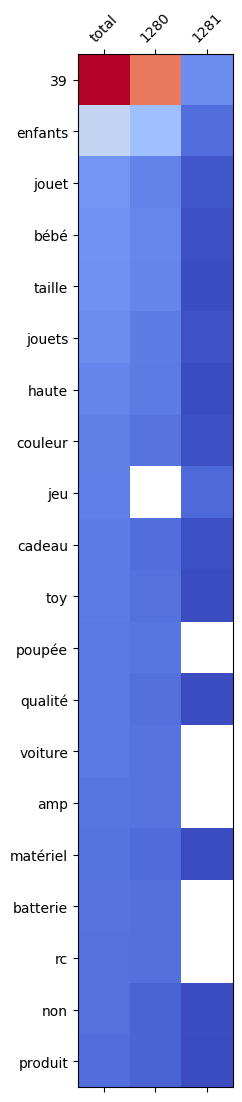

In [ ]:
fig, ax = plt.subplots(figsize=(2,20))
cax = ax.matshow(df_total_livres.iloc[0:20], cmap = 'coolwarm')
plt.xticks(range(3),('total','1280','1281'),rotation=45)
plt.yticks(range(20),df_total_livres.iloc[0:20].index,rotation=0)
plt.show()

In [ ]:
ds.ajout_REPORT_40_PRED(y_orig, y_pred,svc.get_REPORT_MODELE(),svc.get_REPORT_LIBELLE(),svc.get_REPORT_ID())
print(svc.get_REPORT_ID())
print(svc.get_REPORT_LIBELLE())

SVM1
SVM AVEC TDIDF


In [ ]:
# RECUPERATION
"""
train_acc,val_acc,tloss,tvalloss = test.restore_fit_arrays()
y_orig,y_pred = test.restore_predict_arrays()
df_pred = test.restore_predict_dataframe()

"""



# LogisticRegression

In [ ]:
import Bibli_DataScience_3 as ds
import ML_DataScience as ml
import imp
imp.reload(ds)
imp.reload(ml)

<module 'ML_DataScience' from 'E:\\Manuel\\PROJET\\ML_DataScience.py'>

In [ ]:
lr = ml.ML_LogisticRegression("LogisticRegression")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
lr.fit_modele(savefics=True,Train="Save")

F1 Score:  0.8018564958168756
Accuracy:  0.8022845030617052


In [ ]:
df_cross = lr.get_df_cross()
df_pred = lr.get_df_pred()
df_pred

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.669342,2280,0.144462,2403,0.073836
1,40,40,0.593625,10,0.103586,50,0.075697
2,50,50,0.752976,2462,0.062500,40,0.032738
3,60,60,0.759036,2462,0.090361,50,0.078313
4,1140,1140,0.756554,1280,0.044944,2280,0.035581
5,1160,1160,0.929204,10,0.027813,2280,0.013906
6,1180,1180,0.509804,10,0.143791,1140,0.078431
7,1280,1280,0.610883,1300,0.152977,1140,0.053388
8,1281,1281,0.478261,1280,0.212560,10,0.067633
9,1300,1300,0.949455,1280,0.017839,10,0.009911


In [ ]:
df_prob = lr.get_df_prob()
df_prob.head()

,predicted_class,ProbMax
0,1301,0.265662
1,1140,0.303566
2,2583,0.939505
3,2280,0.378499
4,2403,0.367644


In [ ]:
y_orig = lr.get_y_orig()
y_pred = lr.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 80.22845030617052 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.45      0.67      0.53       623
          40       0.74      0.59      0.66       502
          50       0.74      0.75      0.74       336
          60       0.98      0.76      0.85       166
        1140       0.78      0.76      0.77       534
        1160       0.88      0.93      0.90       791
        1180       0.88      0.51      0.64       153
        1280       0.68      0.61      0.64       974
        1281       0.74      0.48      0.58       414
        1300       0.84      0.95      0.89      1009
        1301       0.98      0.84      0.90       161
        1302       0.81      0.75      0.78       498
        1320       0.83      0.73      0.78       648
        1560       0.79      0.82      0.80      1015
        1920       0.90      0.92      0.91       861
        1940       0.95      0.7

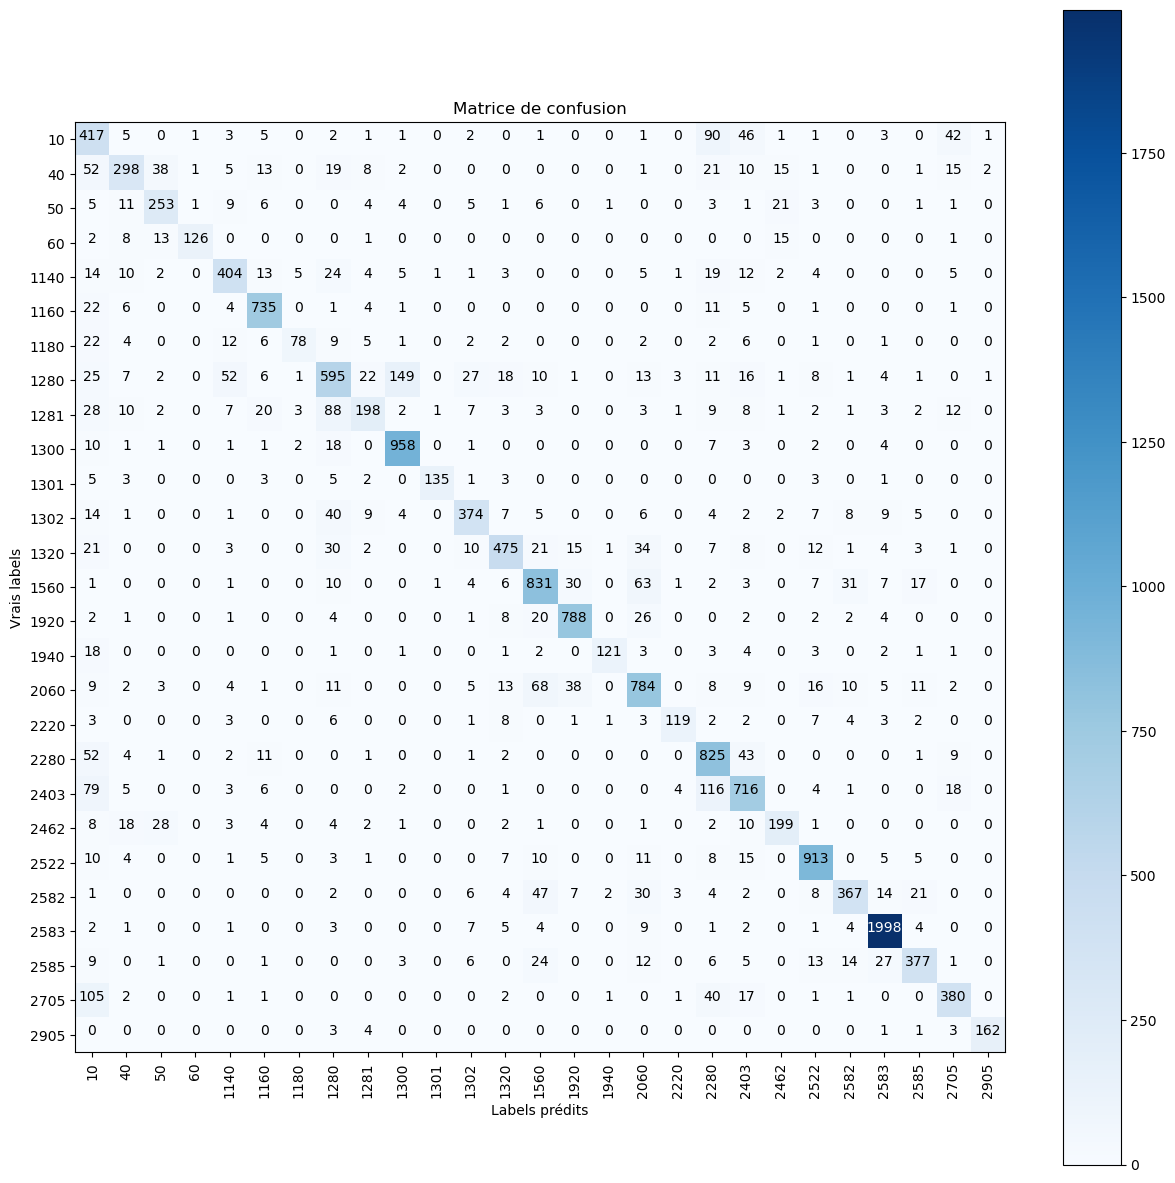

In [ ]:
ds.show_confusion_matrix(y_orig, y_pred)

In [ ]:
Lcat=lr.get_cat()
print(Lcat)
catdict = lr.get_catdict()
catdict

[  10   40   50   60 1140 1160 1180 1280 1281 1300 1301 1302 1320 1560
 1920 1940 2060 2220 2280 2403 2462 2522 2582 2583 2585 2705 2905]


{10: 'livres',
 40: 'jeux video pour pc et consoles',
 50: ' accesoires jeux video',
 60: 'consoles de jeux video',
 1140: 'produits derives “geeks” et figurines',
 1160: 'cartes collectionables',
 1180: 'figurines collectionables pour jeux de societe',
 1280: 'jouets, peluches, puppets',
 1281: 'jeux de societe/cartes',
 1300: 'Petites voitures (jouets) et maquettes',
 1301: 'accesoires pour petis enfants/bebes et mobilier de jeu (flechettes, billard, babyfoot)',
 1302: "jeux d'exterieur",
 1320: 'sacs pour femmes et accesore petite enfance',
 1560: 'Mobilier et produits decoration/rangement pour la maison',
 1920: 'linge de maison (cousins, rideaux, serviettes, nappes, draps)',
 1940: 'nouriture (cafes,infusions,conserves, epices,etc)',
 2060: 'lampes et accesoires decoration pour maison',
 2220: 'accesoires mascots/pets',
 2280: 'magazines',
 2403: 'livres et bds',
 2462: 'consoles de jeux video et jeux videos',
 2522: 'produits de papeterie et rangement bureau',
 2582: "mobilier d'

In [ ]:
ds.Afficher_repartition(df_cross,Lcat,catdict)

10    ------    livres
  : 10,  : 66.93 % , livres
  : 2280,  : 14.45 % , magazines
  : 2403,  : 7.38 % , livres et bds
  : 2705,  : 6.74 % , bds et livres
  : 40,  : 0.8 % , jeux video pour pc et consoles
40    ------    jeux video pour pc et consoles
  : 40,  : 59.36 % , jeux video pour pc et consoles
  : 10,  : 10.36 % , livres
  : 50,  : 7.57 % ,  accesoires jeux video
  : 2280,  : 4.18 % , magazines
  : 1280,  : 3.78 % , jouets, peluches, puppets
50    ------     accesoires jeux video
  : 50,  : 75.3 % ,  accesoires jeux video
  : 2462,  : 6.25 % , consoles de jeux video et jeux videos
  : 40,  : 3.27 % , jeux video pour pc et consoles
  : 1140,  : 2.68 % , produits derives “geeks” et figurines
  : 1560,  : 1.79 % , Mobilier et produits decoration/rangement pour la maison
60    ------    consoles de jeux video
  : 60,  : 75.9 % , consoles de jeux video
  : 2462,  : 9.04 % , consoles de jeux video et jeux videos
  : 50,  : 7.83 % ,  accesoires jeux video
  : 40,  : 4.82 % , jeux vi

E:\Manuel\PROJET\Bibli_DataScience_3.py:134: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in s.iteritems():


In [ ]:
ds.ajout_REPORT_40_PRED(y_orig, y_pred,lr.get_REPORT_MODELE(),lr.get_REPORT_LIBELLE(),lr.get_REPORT_ID())
print(lr.get_REPORT_ID())
print(lr.get_REPORT_LIBELLE())

LR1
LogisticRegression AVEC TDIDF


# RandomForestClassifier

In [ ]:
forest = ml.ML_RandomForest("RandomForestClassifier")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


preprocessing ...


In [ ]:
forest.fit_modele(savefics=True,Train="Save")

F1 Score:  0.7932958883861291
Accuracy:  0.7926283560998587


In [ ]:
df_cross = forest.get_df_cross()
df_pred = forest.get_df_pred()
df_pred

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.701445,2280,0.094703,2403,0.078652
1,40,40,0.609562,10,0.105578,2462,0.059761
2,50,50,0.752976,2462,0.083333,40,0.023810
3,60,60,0.807229,2462,0.114458,50,0.048193
4,1140,1140,0.780899,10,0.037453,1280,0.031835
5,1160,1160,0.924147,10,0.031606,2280,0.015171
6,1180,1180,0.542484,10,0.156863,1140,0.071895
7,1280,1280,0.611910,1300,0.132444,1140,0.056468
8,1281,1281,0.514493,1280,0.195652,10,0.060386
9,1300,1300,0.929633,1280,0.030723,10,0.017839


In [ ]:
df_prob = forest.get_df_prob()
df_prob.head()

,predicted_class,ProbMax
0,1301,0.78000
1,1140,0.51000
2,2583,1.00000
3,2280,0.30093
4,2403,0.67000


In [ ]:
y_orig = forest.get_y_orig()
y_pred = forest.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 79.26283560998587 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.40      0.70      0.51       623
          40       0.78      0.61      0.68       502
          50       0.83      0.75      0.79       336
          60       0.99      0.81      0.89       166
        1140       0.77      0.78      0.78       534
        1160       0.89      0.92      0.90       791
        1180       0.88      0.54      0.67       153
        1280       0.68      0.61      0.64       974
        1281       0.68      0.51      0.59       414
        1300       0.84      0.93      0.88      1009
        1301       0.99      0.84      0.91       161
        1302       0.90      0.70      0.79       498
        1320       0.85      0.72      0.78       648
        1560       0.76      0.80      0.78      1015
        1920       0.89      0.90      0.90       861
        1940       0.95      0.7

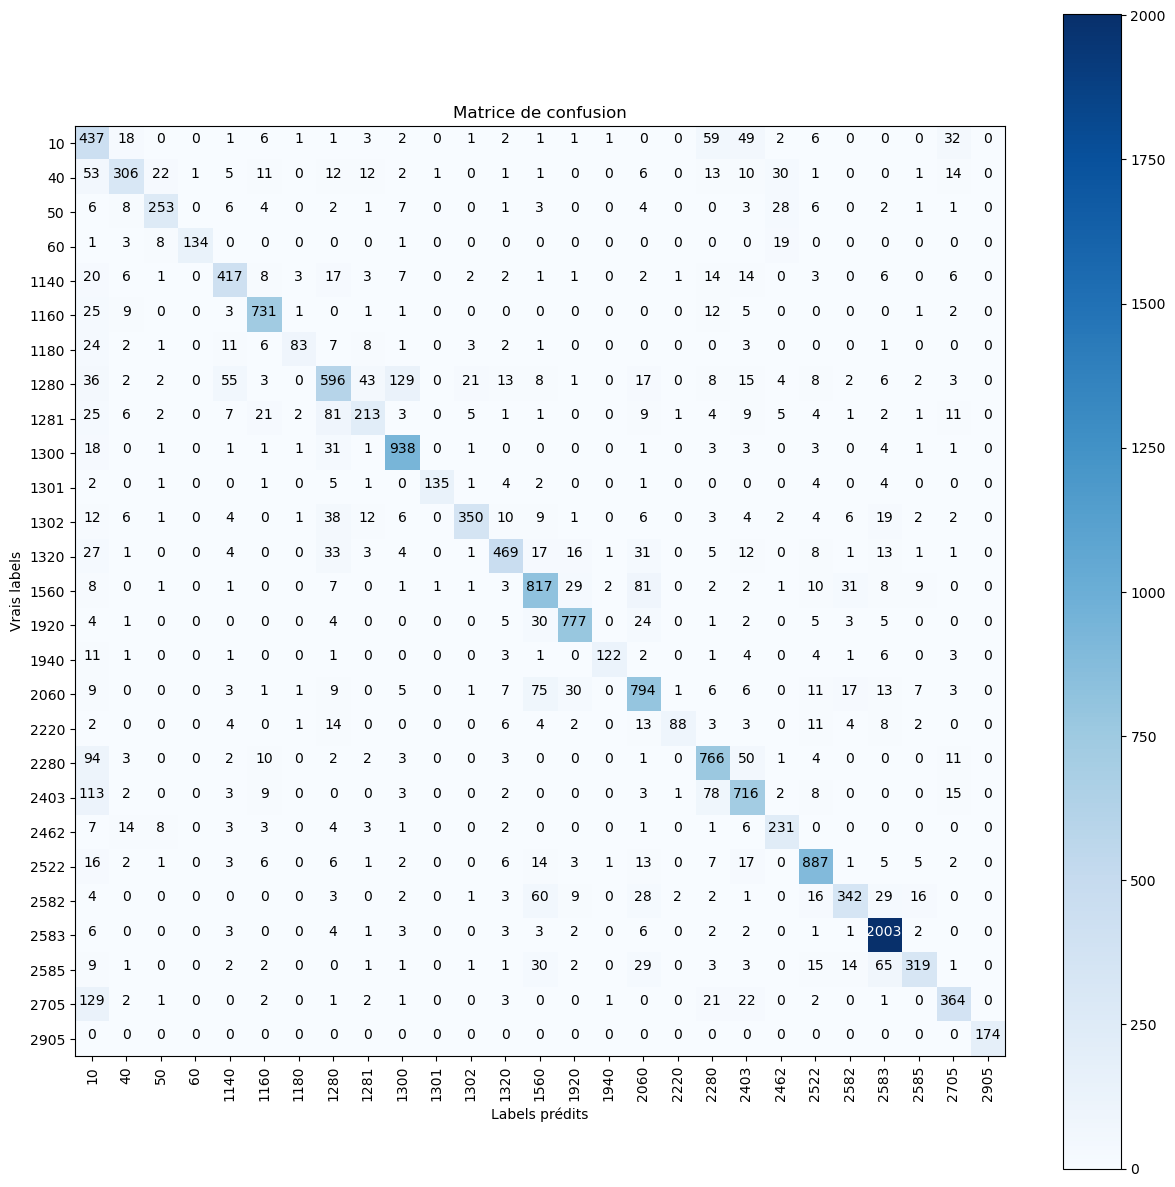

In [ ]:
ds.show_confusion_matrix(y_orig, y_pred)

In [ ]:
Lcat=forest.get_cat()
print(Lcat)
catdict = forest.get_catdict()

[  10   40   50   60 1140 1160 1180 1280 1281 1300 1301 1302 1320 1560
 1920 1940 2060 2220 2280 2403 2462 2522 2582 2583 2585 2705 2905]


In [ ]:
ds.Afficher_repartition(df_cross,Lcat,catdict)

10    ------    livres
  : 10,  : 70.14 % , livres
  : 2280,  : 9.47 % , magazines
  : 2403,  : 7.87 % , livres et bds
  : 2705,  : 5.14 % , bds et livres
  : 40,  : 2.89 % , jeux video pour pc et consoles
40    ------    jeux video pour pc et consoles
  : 40,  : 60.96 % , jeux video pour pc et consoles
  : 10,  : 10.56 % , livres
  : 2462,  : 5.98 % , consoles de jeux video et jeux videos
  : 50,  : 4.38 % ,  accesoires jeux video
  : 2705,  : 2.79 % , bds et livres
50    ------     accesoires jeux video
  : 50,  : 75.3 % ,  accesoires jeux video
  : 2462,  : 8.33 % , consoles de jeux video et jeux videos
  : 40,  : 2.38 % , jeux video pour pc et consoles
  : 1300,  : 2.08 % , Petites voitures (jouets) et maquettes
  : 10,  : 1.79 % , livres
60    ------    consoles de jeux video
  : 60,  : 80.72 % , consoles de jeux video
  : 2462,  : 11.45 % , consoles de jeux video et jeux videos
  : 50,  : 4.82 % ,  accesoires jeux video
  : 40,  : 1.81 % , jeux video pour pc et consoles
  : 10,  

E:\Manuel\PROJET\Bibli_DataScience_3.py:134: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in s.iteritems():


In [ ]:
ds.ajout_REPORT_40_PRED(y_orig, y_pred,forest.get_REPORT_MODELE(),forest.get_REPORT_LIBELLE(),forest.get_REPORT_ID())
print(forest.get_REPORT_ID())
print(forest.get_REPORT_LIBELLE())

FOREST1
RandomForest AVEC TDIDF


# GradientBoosting

In [ ]:
import Bibli_DataScience_3 as ds
import ML_DataScience as ml
import imp
imp.reload(ds)
imp.reload(ml)

section :  ['DOSSIER', 'FICHIER']


<module 'ML_DataScience' from 'E:\\Manuel\\PROJET\\ML_DataScience.py'>

In [ ]:
gboost  = ml.ML_GradientBoosting("GradientBoosting")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


preprocessing ...


In [ ]:
gboost.fit_modele(savefics=True,Train="Save")

F1 Score:  0.7615019583030268
Accuracy:  0.7598327837965144


In [ ]:
print( gboost.get_REPORT_ID())
print( gboost.get_REPORT_LIBELLE())

GRBOOST1
GradientBoosting AVEC TDIDF


In [ ]:
df_cross = gboost.get_df_cross()
df_pred = gboost.get_df_pred()
df_pred

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.577849,2280,0.130016,2403,0.118780
1,40,40,0.543825,10,0.125498,50,0.065737
2,50,50,0.598214,2462,0.089286,10,0.062500
3,60,60,0.740964,2462,0.066265,50,0.060241
4,1140,1140,0.705993,10,0.063670,1280,0.050562
5,1160,1160,0.906448,10,0.036662,1180,0.011378
6,1180,1180,0.392157,10,0.183007,1280,0.084967
7,1280,1280,0.607803,1300,0.116016,1281,0.058522
8,1281,1281,0.442029,1280,0.183575,10,0.065217
9,1300,1300,0.898910,1280,0.034688,10,0.015857


In [ ]:
df_prob = gboost.get_df_prob()
df_prob.head()

,predicted_class,ProbMax
0,1301,0.997367
1,1140,0.334124
2,2583,0.981551
3,2280,0.355996
4,2403,0.458818


In [ ]:
y_orig = gboost.get_y_orig()
y_pred = gboost.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 75.48280734809232 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.34      0.58      0.43       623
          40       0.66      0.54      0.60       502
          50       0.69      0.60      0.64       336
          60       0.83      0.74      0.78       166
        1140       0.77      0.71      0.74       534
        1160       0.87      0.91      0.89       791
        1180       0.50      0.39      0.44       153
        1280       0.62      0.61      0.62       974
        1281       0.58      0.44      0.50       414
        1300       0.86      0.90      0.88      1009
        1301       0.80      0.71      0.75       161
        1302       0.78      0.68      0.73       498
        1320       0.81      0.71      0.76       648
        1560       0.76      0.80      0.78      1015
        1920       0.90      0.88      0.89       861
        1940       0.66      0.5

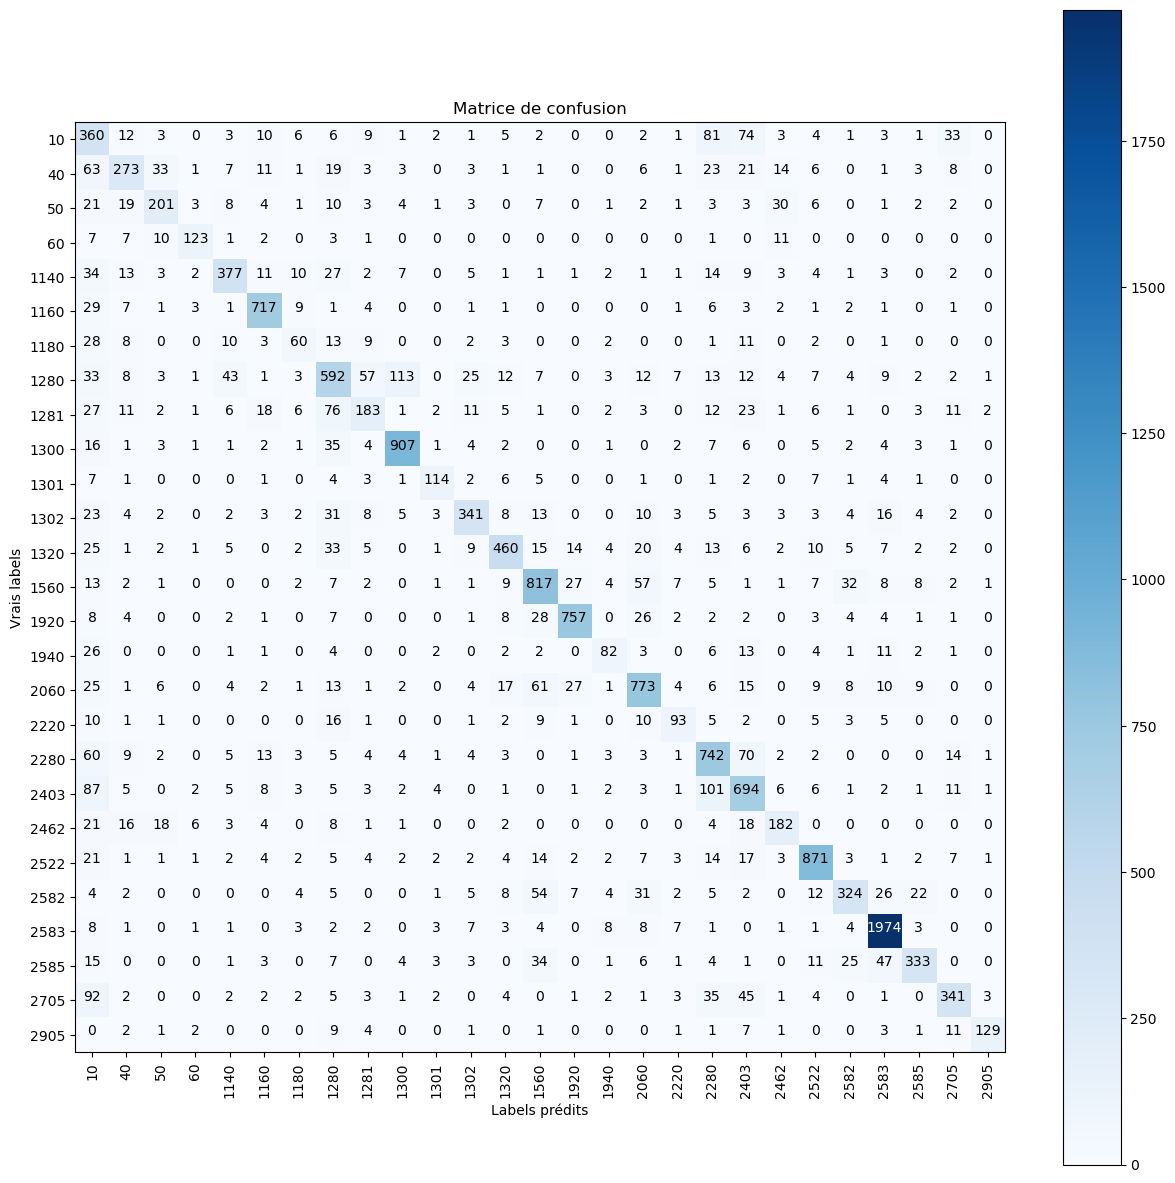

In [ ]:
ds.show_confusion_matrix(y_orig, y_pred)

In [ ]:
Lcat=gboost.get_cat()
print(Lcat)
catdict = gboost.get_catdict()

[  10   40   50   60 1140 1160 1180 1280 1281 1300 1301 1302 1320 1560
 1920 1940 2060 2220 2280 2403 2462 2522 2582 2583 2585 2705 2905]


In [ ]:
ds.Afficher_repartition(df_cross,Lcat,catdict)

10    ------    livres
  : 10,  : 57.78 % , livres
  : 2280,  : 13.0 % , magazines
  : 2403,  : 11.88 % , livres et bds
  : 2705,  : 5.3 % , bds et livres
  : 40,  : 1.93 % , jeux video pour pc et consoles
40    ------    jeux video pour pc et consoles
  : 40,  : 54.38 % , jeux video pour pc et consoles
  : 10,  : 12.55 % , livres
  : 50,  : 6.57 % ,  accesoires jeux video
  : 2280,  : 4.58 % , magazines
  : 2403,  : 4.18 % , livres et bds
50    ------     accesoires jeux video
  : 50,  : 59.82 % ,  accesoires jeux video
  : 2462,  : 8.93 % , consoles de jeux video et jeux videos
  : 10,  : 6.25 % , livres
  : 40,  : 5.65 % , jeux video pour pc et consoles
  : 1280,  : 2.98 % , jouets, peluches, puppets
60    ------    consoles de jeux video
  : 60,  : 74.1 % , consoles de jeux video
  : 2462,  : 6.63 % , consoles de jeux video et jeux videos
  : 50,  : 6.02 % ,  accesoires jeux video
  : 10,  : 4.22 % , livres
  : 40,  : 4.22 % , jeux video pour pc et consoles
1140    ------    produi

E:\Manuel\PROJET\Bibli_DataScience_3.py:134: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in s.iteritems():


In [ ]:
ds.ajout_REPORT_40_PRED(y_orig, y_pred, gboost.get_REPORT_MODELE(), gboost.get_REPORT_LIBELLE(), gboost.get_REPORT_ID())
print( gboost.get_REPORT_ID())
print( gboost.get_REPORT_LIBELLE())

GRBOOST1
GradientBoosting AVEC TDIDF


# XGBClassifier

In [ ]:
import Bibli_DataScience_3 as ds
import ML_DataScience as ml
import imp
imp.reload(ds)
imp.reload(ml)

<module 'ML_DataScience' from 'E:\\Manuel\\PROJET\\ML_DataScience.py'>

In [ ]:
xgboost= ml.ML_XGBClassifier("XGBClassifier")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
xgboost.fit_modele(savefics=True,Train="Load")

F1 Score:  0.8218895322680778
Accuracy:  0.8171808761186999


F1 Score:  0.8230882740565053
Accuracy:  0.8181229392369289
xgb.XGBClassifier(learning_rate=0.1,n_estimators=500,max_depth=7)

In [ ]:
F1 Score:  0.824497612631608
Accuracy:  0.8204780970325012
learning_rate=0.1,n_estimators=500,max_depth=10)

In [ ]:
print(xgboost.get_REPORT_ID())
print( xgboost.get_REPORT_LIBELLE())

xgboost1
XGBClassifier AVEC TDIDF


In [ ]:
df_cross =xgboost.get_df_cross()
df_pred = xgboost.get_df_pred()
df_pred.head()

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.727127,2280,0.093098,2403,0.060995
1,40,40,0.621514,10,0.147410,50,0.049801
2,50,50,0.782738,2462,0.077381,40,0.035714
3,60,60,0.813253,50,0.096386,2462,0.060241
4,1140,1140,0.762172,10,0.046816,1280,0.046816


In [ ]:
df_prob = xgboost.get_df_prob()
df_prob.head()

,predicted_class,ProbMax
0,1301,0.994297
1,1140,0.482614
2,2583,0.999985
3,2280,0.347702
4,2403,0.503750


In [ ]:
y_orig = xgboost.get_y_orig()
y_pred = xgboost.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 81.71808761186999 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.37      0.73      0.49       623
          40       0.77      0.62      0.69       502
          50       0.77      0.78      0.77       336
          60       0.95      0.81      0.88       166
        1140       0.81      0.76      0.79       534
        1160       0.91      0.90      0.91       791
        1180       0.80      0.59      0.68       153
        1280       0.75      0.75      0.75       974
        1281       0.67      0.57      0.62       414
        1300       0.95      0.94      0.95      1009
        1301       0.96      0.88      0.92       161
        1302       0.90      0.80      0.84       498
        1320       0.84      0.76      0.80       648
        1560       0.85      0.82      0.84      1015
        1920       0.91      0.93      0.92       861
        1940       0.87      0.8

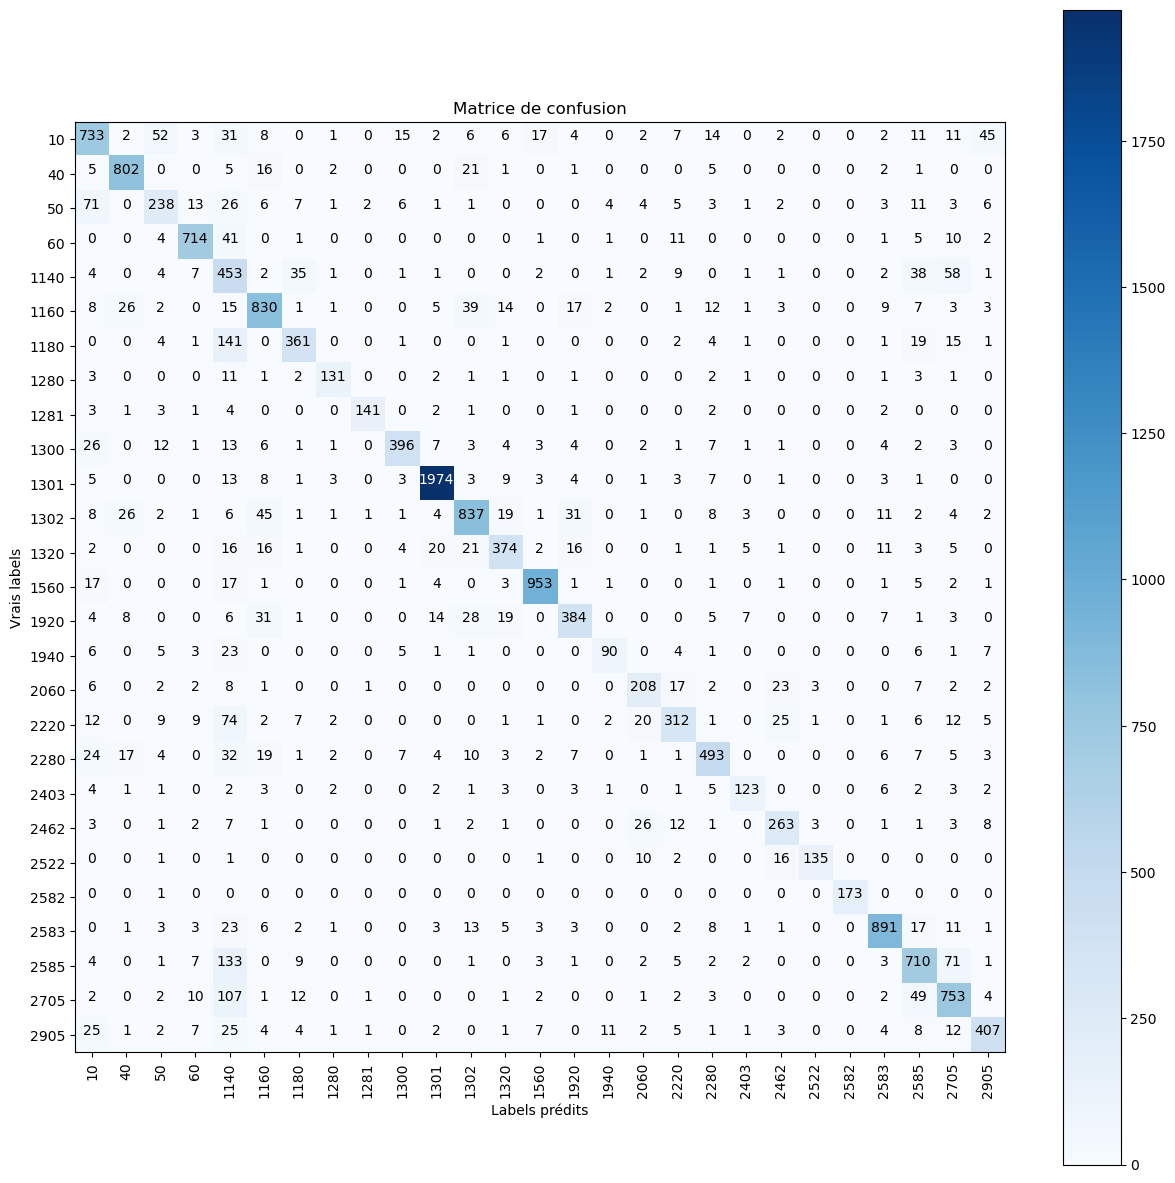

In [ ]:
ds.show_confusion_matrix(y_orig, y_pred)

In [ ]:
Lcat=xgboost.get_cat()
print(Lcat)
catdict = xgboost.get_catdict()
ds.Afficher_repartition(df_cross,Lcat,catdict)

[  10   40   50   60 1140 1160 1180 1280 1281 1300 1301 1302 1320 1560
 1920 1940 2060 2220 2280 2403 2462 2522 2582 2583 2585 2705 2905]
10    ------    livres
  : 10,  : 72.71 % , livres
  : 2280,  : 9.31 % , magazines
  : 2403,  : 6.1 % , livres et bds
  : 2705,  : 5.62 % , bds et livres
  : 40,  : 1.44 % , jeux video pour pc et consoles
40    ------    jeux video pour pc et consoles
  : 40,  : 62.15 % , jeux video pour pc et consoles
  : 10,  : 14.74 % , livres
  : 50,  : 4.98 % ,  accesoires jeux video
  : 2462,  : 3.98 % , consoles de jeux video et jeux videos
  : 1280,  : 2.39 % , jouets, peluches, puppets
50    ------     accesoires jeux video
  : 50,  : 78.27 % ,  accesoires jeux video
  : 2462,  : 7.74 % , consoles de jeux video et jeux videos
  : 40,  : 3.57 % , jeux video pour pc et consoles
  : 1140,  : 2.38 % , produits derives “geeks” et figurines
  : 10,  : 2.08 % , livres
60    ------    consoles de jeux video
  : 60,  : 81.33 % , consoles de jeux video
  : 50,  : 9.64

E:\Manuel\PROJET\Bibli_DataScience_3.py:134: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in s.iteritems():


In [ ]:
ds.ajout_REPORT_40_PRED(y_orig, y_pred, xgboost.get_REPORT_MODELE(), xgboost.get_REPORT_LIBELLE(), xgboost.get_REPORT_ID())
print( xgboost.get_REPORT_ID())
print( xgboost.get_REPORT_LIBELLE())

xgboost1
XGBClassifier AVEC TDIDF


# MultinomialNB

In [ ]:
import Bibli_DataScience_3 as ds
import ML_DataScience as ml
import imp
imp.reload(ds)
imp.reload(ml)

<module 'ML_DataScience' from 'E:\\Manuel\\PROJET\\ML_DataScience.py'>

In [ ]:
NB = ml.ML_MultinomialNB("MultinomialNB")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
NB.fit_modele(savefics=True,Train="Load")

F1 Score:  0.7869377756174585
Accuracy:  0.7910386245878473


In [ ]:
print(NB.get_REPORT_ID())
print( NB.get_REPORT_LIBELLE())

MULTINB1
MultinomialNB AVEC TDIDF


In [ ]:
df_cross =NB.get_df_cross()
df_pred = NB.get_df_pred()
df_pred.head()

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.398074,2280,0.136437,2705,0.134831
1,40,40,0.563745,50,0.101594,2462,0.063745
2,50,50,0.785714,2462,0.089286,60,0.026786
3,60,60,0.740964,2462,0.132530,50,0.072289
4,1140,1140,0.823970,1280,0.043071,40,0.016854


In [ ]:
df_prob = NB.get_df_prob()
df_prob.head()

,predicted_class,ProbMax
0,1301,0.976781
1,1140,0.971027
2,2583,0.999876
3,2280,0.867870
4,2403,0.865878


In [ ]:
y_orig = NB.get_y_orig()
y_pred = NB.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 79.10386245878473 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.68      0.40      0.50       623
          40       0.76      0.56      0.65       502
          50       0.69      0.79      0.73       336
          60       0.86      0.74      0.80       166
        1140       0.66      0.82      0.73       534
        1160       0.93      0.96      0.95       791
        1180       0.73      0.61      0.66       153
        1280       0.65      0.56      0.60       974
        1281       0.67      0.49      0.56       414
        1300       0.81      0.94      0.87      1009
        1301       0.91      0.91      0.91       161
        1302       0.76      0.76      0.76       498
        1320       0.82      0.75      0.79       648
        1560       0.75      0.75      0.75      1015
        1920       0.88      0.90      0.89       861
        1940       0.82      0.9

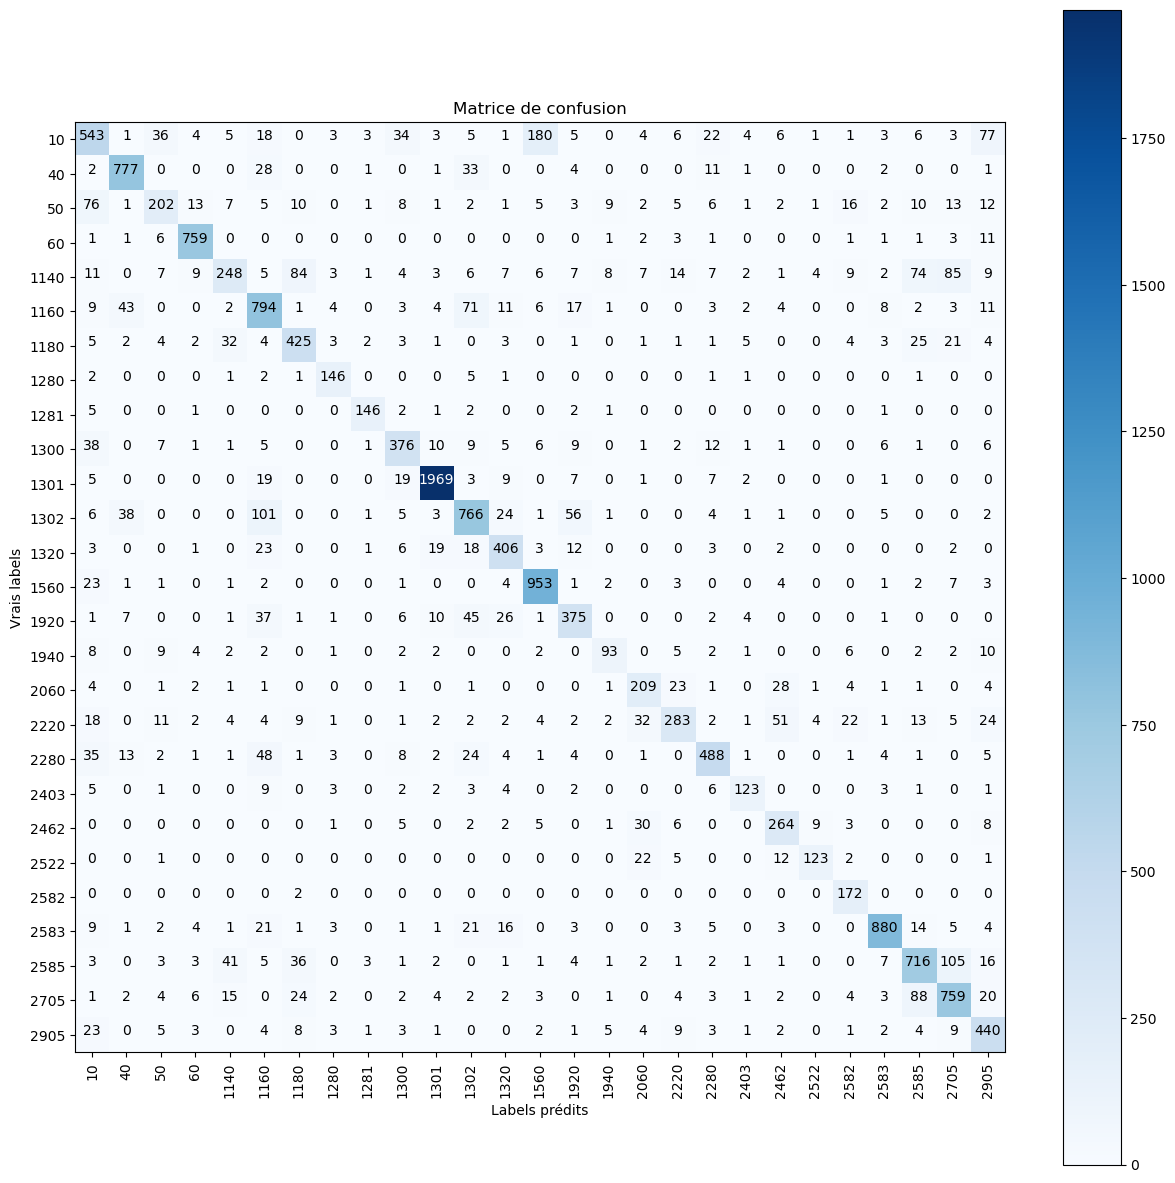

In [ ]:
ds.show_confusion_matrix(y_orig, y_pred)

In [ ]:
Lcat=NB.get_cat()
print(Lcat)
catdict = NB.get_catdict()
ds.Afficher_repartition(df_cross,Lcat,catdict)

[  10   40   50   60 1140 1160 1180 1280 1281 1300 1301 1302 1320 1560
 1920 1940 2060 2220 2280 2403 2462 2522 2582 2583 2585 2705 2905]
10    ------    livres
  : 10,  : 39.81 % , livres
  : 2280,  : 13.64 % , magazines
  : 2705,  : 13.48 % , bds et livres
  : 2403,  : 11.88 % , livres et bds
  : 40,  : 2.25 % , jeux video pour pc et consoles
40    ------    jeux video pour pc et consoles
  : 40,  : 56.37 % , jeux video pour pc et consoles
  : 50,  : 10.16 % ,  accesoires jeux video
  : 2462,  : 6.37 % , consoles de jeux video et jeux videos
  : 1140,  : 4.78 % , produits derives “geeks” et figurines
  : 2905,  : 4.38 % , Jeu En téléchargement
50    ------     accesoires jeux video
  : 50,  : 78.57 % ,  accesoires jeux video
  : 2462,  : 8.93 % , consoles de jeux video et jeux videos
  : 60,  : 2.68 % , consoles de jeux video
  : 1140,  : 2.38 % , produits derives “geeks” et figurines
  : 40,  : 1.79 % , jeux video pour pc et consoles
60    ------    consoles de jeux video
  : 60,  :

E:\Manuel\PROJET\Bibli_DataScience_3.py:134: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in s.iteritems():


In [ ]:
ds.ajout_REPORT_40_PRED(y_orig, y_pred, NB.get_REPORT_MODELE(), NB.get_REPORT_LIBELLE(), NB.get_REPORT_ID())
print( NB.get_REPORT_ID())
print( NB.get_REPORT_LIBELLE())

MULTINB1
MultinomialNB AVEC TDIDF


# DecisionTreeClassifier

In [ ]:
import Bibli_DataScience_3 as ds
import ML_DataScience as ml
import imp
imp.reload(ds)
imp.reload(ml)

<module 'ML_DataScience' from 'E:\\Manuel\\PROJET\\ML_DataScience.py'>

In [ ]:
DTCL = ml.ML_DecisionTreeClassifier("DecisionTreeClassifier")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
DTCL.fit_modele(savefics=True,Train="Load")

F1 Score:  0.7276261246404976
Accuracy:  0.7259773904851625


In [ ]:
 max_depth=20
 F1 Score:  0.5512672723964773
Accuracy:  0.5252001884126236

In [ ]:
 max_depth=40
 F1 Score:  0.6145868360252538
Accuracy:  0.5950306170513424

In [ ]:
 max_depth=50
F1 Score:  0.6262212201696967
Accuracy:  0.6082783796514366


In [ ]:
print(DTCL.get_REPORT_ID())
print(DTCL.get_REPORT_LIBELLE())

DTCL1
DecisionTreeClassifier AVEC TDIDF


In [ ]:
df_cross =DTCL.get_df_cross()
df_pred = DTCL.get_df_pred()
df_pred.head()

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.608347,2280,0.097913,2705,0.083467
1,40,40,0.573705,10,0.091633,50,0.053785
2,50,50,0.666667,2462,0.080357,2522,0.035714
3,60,60,0.837349,50,0.078313,2462,0.030120
4,1140,1140,0.711610,1280,0.050562,10,0.035581


In [ ]:
df_prob = DTCL.get_df_prob()
df_prob.head(10)

,predicted_class,ProbMax
0,1301,1.0
1,1140,1.0
2,2583,1.0
3,2280,1.0
4,2403,1.0
5,1280,1.0
6,2060,1.0
7,2583,1.0
8,2705,1.0
9,1940,1.0


In [ ]:
y_orig = DTCL.get_y_orig()
y_pred = DTCL.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 72.59773904851625 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.39      0.61      0.48       623
          40       0.64      0.57      0.60       502
          50       0.68      0.67      0.67       336
          60       0.85      0.84      0.84       166
        1140       0.72      0.71      0.72       534
        1160       0.87      0.88      0.88       791
        1180       0.67      0.59      0.63       153
        1280       0.64      0.56      0.60       974
        1281       0.50      0.51      0.50       414
        1300       0.90      0.91      0.91      1009
        1301       0.92      0.85      0.88       161
        1302       0.70      0.67      0.68       498
        1320       0.64      0.62      0.63       648
        1560       0.69      0.67      0.68      1015
        1920       0.86      0.85      0.86       861
        1940       0.69      0.7

In [ ]:
print(y_orig[:5])
print(y_pred[:5])

25449    1301
66854    1140
67970    2583
57392    2280
26805    2403
Name: prdtypecode, dtype: int64
[1301 1140 2583 2280 2403]


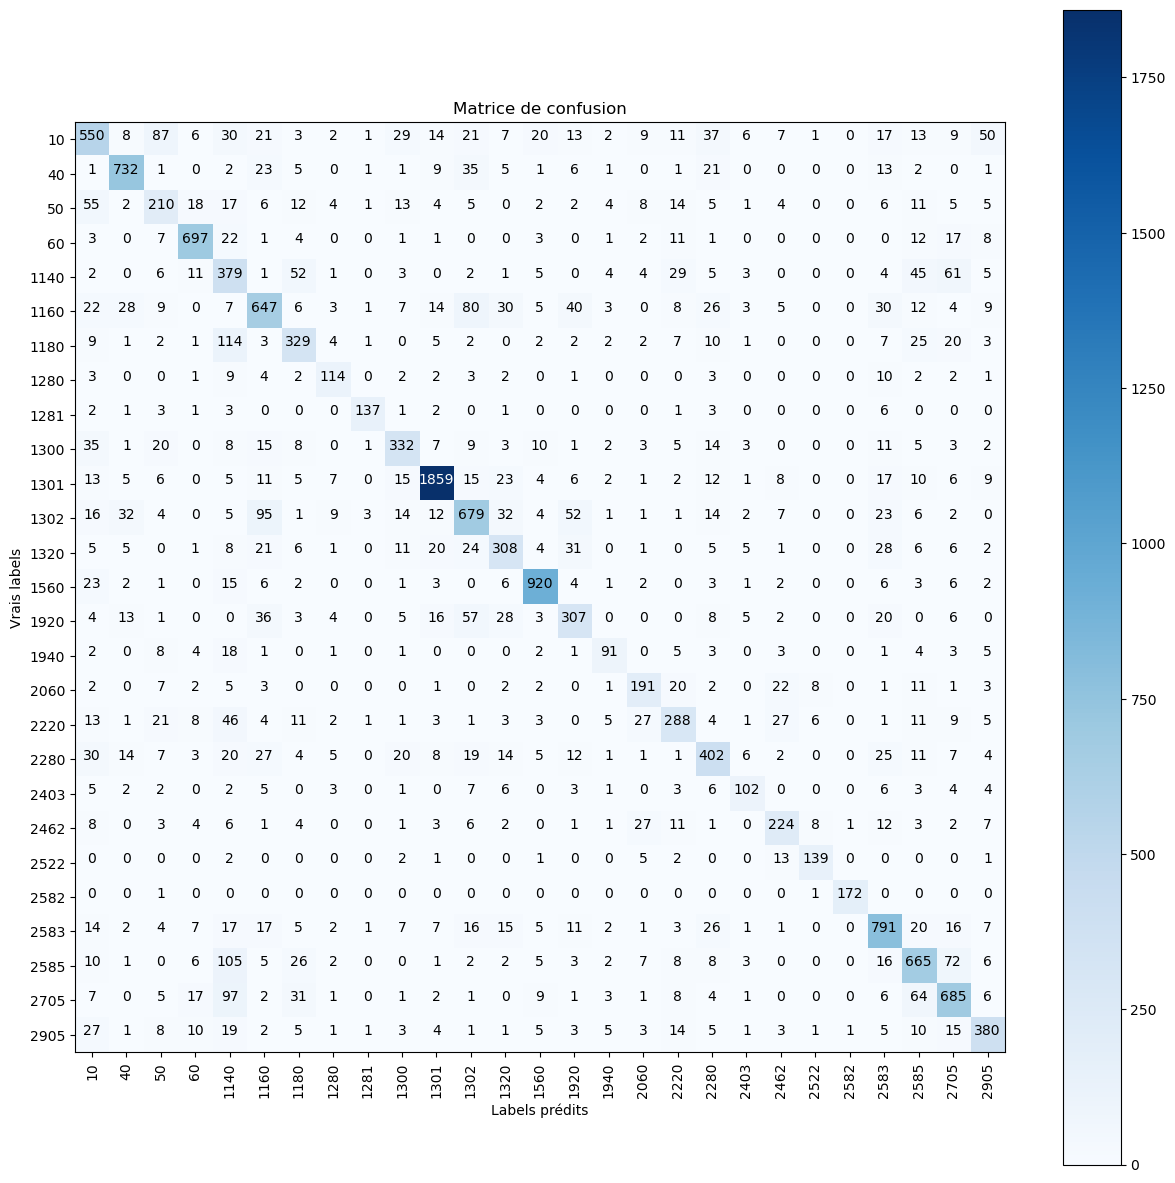

In [ ]:
ds.show_confusion_matrix(y_orig, y_pred)

In [ ]:
Lcat=DTCL.get_cat()
print(Lcat)
catdict = DTCL.get_catdict()
ds.Afficher_repartition(df_cross,Lcat,catdict)

[  10   40   50   60 1140 1160 1180 1280 1281 1300 1301 1302 1320 1560
 1920 1940 2060 2220 2280 2403 2462 2522 2582 2583 2585 2705 2905]
10    ------    livres
  : 10,  : 60.83 % , livres
  : 2280,  : 9.79 % , magazines
  : 2705,  : 8.35 % , bds et livres
  : 2403,  : 7.22 % , livres et bds
  : 40,  : 4.65 % , jeux video pour pc et consoles
40    ------    jeux video pour pc et consoles
  : 40,  : 57.37 % , jeux video pour pc et consoles
  : 10,  : 9.16 % , livres
  : 50,  : 5.38 % ,  accesoires jeux video
  : 2462,  : 5.38 % , consoles de jeux video et jeux videos
  : 1281,  : 4.18 % , jeux de societe/cartes
50    ------     accesoires jeux video
  : 50,  : 66.67 % ,  accesoires jeux video
  : 2462,  : 8.04 % , consoles de jeux video et jeux videos
  : 2522,  : 3.57 % , produits de papeterie et rangement bureau
  : 40,  : 3.27 % , jeux video pour pc et consoles
  : 60,  : 2.38 % , consoles de jeux video
60    ------    consoles de jeux video
  : 60,  : 83.73 % , consoles de jeux vide

E:\Manuel\PROJET\Bibli_DataScience_3.py:134: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in s.iteritems():


In [ ]:
ds.ajout_REPORT_40_PRED(y_orig, y_pred, DTCL.get_REPORT_MODELE(), DTCL.get_REPORT_LIBELLE(), DTCL.get_REPORT_ID())
print( DTCL.get_REPORT_ID())
print(DTCL.get_REPORT_LIBELLE())

DTCL1
DecisionTreeClassifier AVEC TDIDF


# LinearSVC FromModel

In [ ]:
import Bibli_DataScience_3 as ds
import ML_DataScience as ml
import imp
imp.reload(ds)
imp.reload(ml)

<module 'ML_DataScience' from 'E:\\Manuel\\PROJET\\ML_DataScience.py'>

In [ ]:
lsvc = ml.ML_LinearSVCFromModel("LinearSVC")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
lsvc.fit_modele(savefics=True,Train="Save")

L'heure au début de l'entraînement était :  2023-09-25 14:15:48.345779
L'heure à la fin de l'entraînement était :  2023-09-25 14:15:58.690214
nom modele :  LinearSVC
La durée de l'entraînement était :  0:00:10.344435


In [ ]:
print(lsvc.get_REPORT_ID())
print(lsvc.get_REPORT_LIBELLE())

SVM2


AttributeError: 'ML_LinearSVC' object has no attribute 'get_REPORT_LIBELLE'

In [ ]:
train_X_svc = ds.load_ndarray('LinearSVC_CONCAT2_X_train')
test_X_svc = ds.load_ndarray('LinearSVC_CONCAT2_X_test')
train_y_svc = ds.load_ndarray('LinearSVC_CONCAT2_y_train')
test_y_svc = ds.load_ndarray('LinearSVC_CONCAT2_y_test')

#  LinearSVC

In [ ]:
import Bibli_DataScience_3 as ds
import ML_DataScience as ml
import imp
imp.reload(ds)
imp.reload(ml)

<module 'ML_DataScience' from 'E:\\Manuel\\PROJET\\ML_DataScience.py'>

In [ ]:
linsvc = ml.ML_LinearSVC("LinearSVC")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
linsvc.fit_modele(savefics=True,Train="Save")

L'heure au début de l'entraînement était :  2023-09-25 14:44:57.645774
L'heure à la fin de l'entraînement était :  2023-09-25 14:45:09.305127
nom modele :  LinearSVC
F1 Score:  0.8308272614934256
Accuracy:  0.8317828544512482
La durée de l'entraînement était :  0:00:11.659353


In [ ]:
print(linsvc.get_REPORT_ID())
print( linsvc.get_REPORT_LIBELLE())

SVM2
LinearSVC AVEC TDIDF


In [ ]:
df_pred = linsvc.get_df_pred()
df_pred.head()

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.597111,2280,0.125201,2403,0.101124
1,40,40,0.673307,50,0.059761,10,0.035857
2,50,50,0.824405,2462,0.080357,40,0.032738
3,60,60,0.813253,50,0.072289,2462,0.066265
4,1140,1140,0.782772,1280,0.050562,40,0.022472


In [ ]:
y_orig = linsvc.get_y_orig()
y_pred = linsvc.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 83.17828544512483 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.57      0.60      0.59       623
          40       0.72      0.67      0.70       502
          50       0.76      0.82      0.79       336
          60       0.94      0.81      0.87       166
        1140       0.78      0.78      0.78       534
        1160       0.92      0.96      0.94       791
        1180       0.76      0.62      0.68       153
        1280       0.73      0.70      0.71       974
        1281       0.66      0.57      0.61       414
        1300       0.91      0.95      0.93      1009
        1301       0.96      0.92      0.94       161
        1302       0.83      0.83      0.83       498
        1320       0.85      0.79      0.82       648
        1560       0.83      0.83      0.83      1015
        1920       0.90      0.92      0.91       861
        1940       0.91      0.9

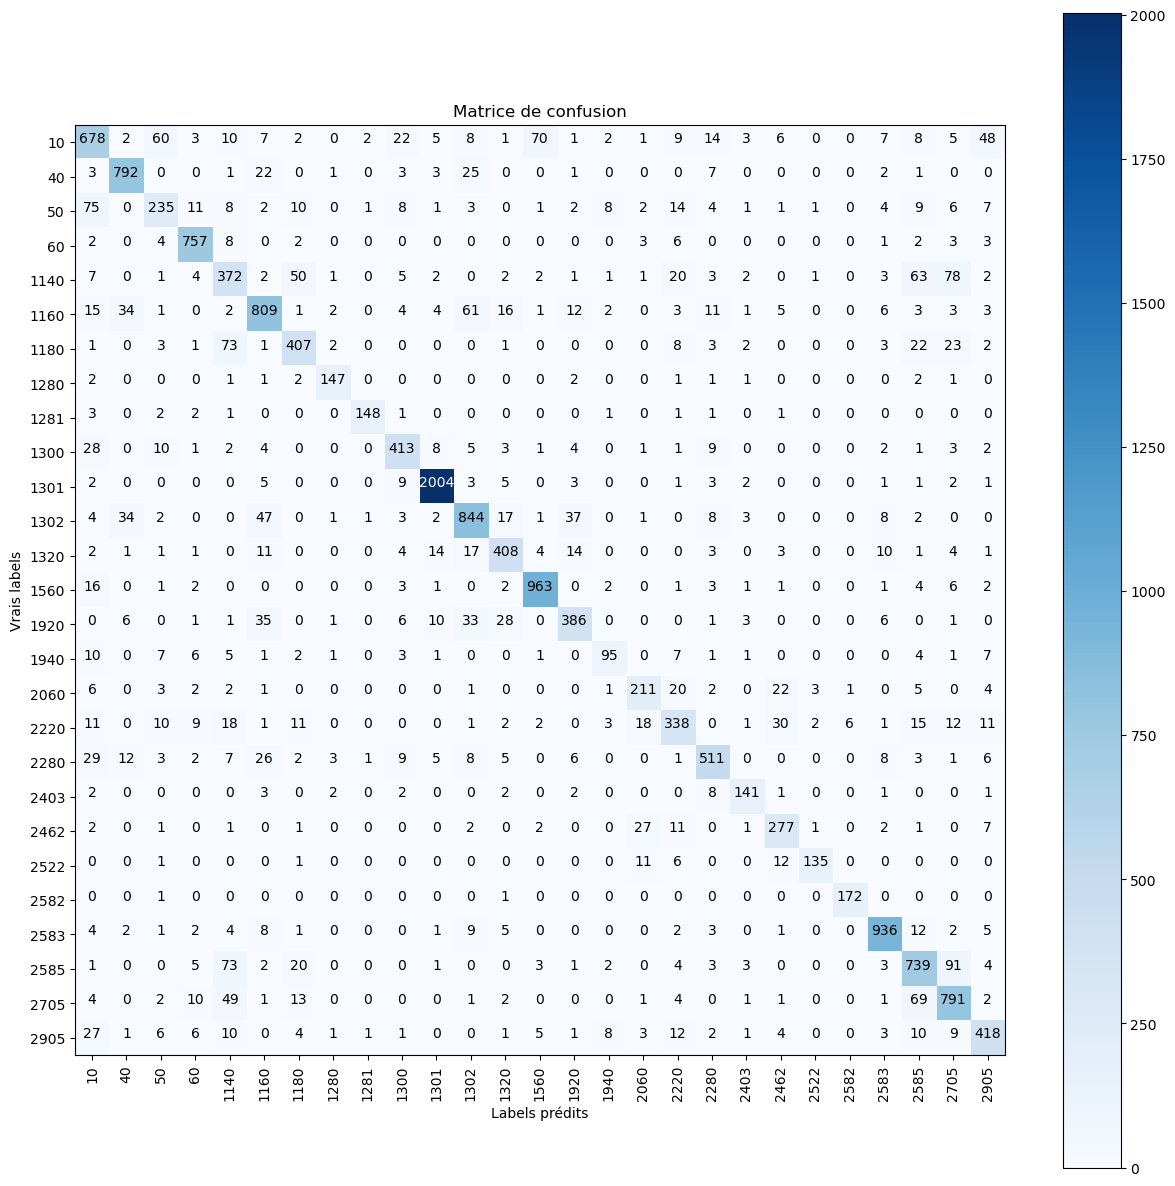

In [ ]:
ds.show_confusion_matrix(y_orig, y_pred)

# Grid_RandomForest

In [ ]:
import Bibli_DataScience_3 as ds
import ML_DataScience as ml
import imp
imp.reload(ds)
imp.reload(ml)

C:\Users\shaky\AppData\Local\Temp\ipykernel_10536\3181455056.py:3: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


<module 'ML_DataScience' from 'E:\\Manuel\\PROJET\\ML_DataScience.py'>

In [ ]:
Grid_forest = ml.ML_Grid_RandomForest("GridForestClassifier")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
Grid_forest.fit_modele(savefics=True,Train="None")

L'heure au début de l'entraînement était :  2023-09-23 13:37:02.872703
Les meilleurs paramètres sont :
{'clf__criterion': 'entropy', 'clf__max_depth': 70, 'clf__max_features': 'sqrt', 'clf__n_estimators': 220}
Le meilleur score est :
0.692324636697185
L'heure à la fin de l'entraînement était :  2023-09-23 15:43:39.005102
F1 Score:  0.6986370015437644
Accuracy:  0.7033089967027791
La durée de l'entraînement était :  2:06:36.132399


In [ ]:
L'heure au début de l'entraînement était :  2023-09-23 13:37:02.872703
Les meilleurs paramètres sont :
{'clf__criterion': 'entropy', 'clf__max_depth': 70, 'clf__max_features': 'sqrt', 'clf__n_estimators': 220}
Le meilleur score est :
0.692324636697185
L'heure à la fin de l'entraînement était :  2023-09-23 15:43:39.005102
F1 Score:  0.6986370015437644
Accuracy:  0.7033089967027791
La durée de l'entraînement était :  2:06:36.132399

# ML_Grid_MultinomialNB

In [ ]:
import Bibli_DataScience_3 as ds
import ML_DataScience as ml
import imp
imp.reload(ds)
imp.reload(ml)

<module 'ML_DataScience' from 'E:\\Manuel\\PROJET\\ML_DataScience.py'>

In [ ]:
grid_NB = ml.ML_Grid_MultinomialNB("ML_Grid_MultinomialNB")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
grid_NB.fit_modele(savefics=True,Train="Load")

L'heure au début de l'entraînement était :  2023-09-22 21:37:41.402652
Les meilleurs paramètres sont :
{'clf__alpha': 0.1, 'clf__fit_prior': False}
Le meilleur score est :
0.7799564828526362
L'heure à la fin de l'entraînement était :  2023-09-22 21:40:42.653527
F1 Score:  0.7852134499816935
Accuracy:  0.7892133772962788
La durée de l'entraînement était :  0:03:01.250875
